# Data Mining 15.0621 Homework Assignment 2
## Questions 6.1, 7.3, 8.2, 9.3
## By: Jonathan Johannemann

In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt,warnings,random
from sklearn import *
random.seed(11152016) #Today's Date
warnings.filterwarnings('ignore',category=DeprecationWarning)
%matplotlib inline

## Question 6.1

In [9]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Question 6.1 (a)

### Question 6.1 (b)

In [12]:
model = sklearn.linear_model.LinearRegression()
model.fit(bostonhousing[['CRIM','CHAS','RM']],bostonhousing['MEDV'])
print "Intercept: ",model.intercept_
print "CRIM coefficient: ",model.coef_[0]
print "CHAS coefficient: ",model.coef_[1]
print "RM coefficient: ",model.coef_[2]
print "\nEquation: \n",model.intercept_, " + ",model.coef_[0],"CRIM + ",model.coef_[1],"CHAS + ",model.coef_[2],"RM = MEDV"

Intercept:  -28.8106825064
CRIM coefficient:  -0.260724411231
CHAS coefficient:  3.76303705211
RM coefficient:  8.27817981154

Equation: 
-28.8106825064  +  -0.260724411231 CRIM +  3.76303705211 CHAS +  8.27817981154 RM = MEDV


### Question 6.1 (c)

In [13]:
query = pd.DataFrame([['0.1','0','6']],columns=['CRIM','CHAS','RM'])
print "The predicted price is: ",model.predict(query)[0]

The predicted price is:  20.8323239217


In [14]:
tmp = bostonhousing[['CRIM','CHAS','RM']]
query_vals = query.values[0].astype('Float64')
index_closest = np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).ix[np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1))==np.abs(tmp.apply(lambda x: x-query_vals,axis=1).sum(axis=1)).min()].index[0]
print "The error with respect to the closest value is:", np.abs(bostonhousing.MEDV.ix[index_closest]-model.predict(query)[0])

The error with respect to the closest value is: 2.06767607827


### Question 6.1 (d) i.

In [15]:
corr_mat = bostonhousing[['INDUS','NOX','TAX']].corr()
print corr_mat

          INDUS       NOX       TAX
INDUS  1.000000  0.763651  0.720760
NOX    0.763651  1.000000  0.668023
TAX    0.720760  0.668023  1.000000


### Question 6.1 (d) ii.

In [16]:
corr_mat = bostonhousing.corr()
corr_mat.values[[np.arange(len(corr_mat))]*2]=0
corr_mat = corr_mat[np.abs(corr_mat)>0.6].fillna(0).reset_index()

for col in corr_mat.columns.values[1:]:
    if len(corr_mat[corr_mat[col]!=0][col].index)>0:
        print "="*40
        print "Looking at: ",col
        for i in corr_mat[corr_mat[col]!=0][col].index:
            print corr_mat['index'][i]," : ",corr_mat[corr_mat[col]!=0][col][i]
print "="*40

Looking at:  CRIM
RAD  :  0.625505145263
Looking at:  ZN
DIS  :  0.664408222762
Looking at:  INDUS
NOX  :  0.763651446921
AGE  :  0.644778511355
DIS  :  -0.708026988743
TAX  :  0.720760179952
LSTAT  :  0.603799716477
Looking at:  NOX
INDUS  :  0.763651446921
AGE  :  0.731470103786
DIS  :  -0.769230113226
RAD  :  0.611440563486
TAX  :  0.668023200403
Looking at:  RM
LSTAT  :  -0.613808271866
MEDV  :  0.695359947072
CAT.MEDV  :  0.641265408301
Looking at:  AGE
INDUS  :  0.644778511355
NOX  :  0.731470103786
DIS  :  -0.747880540869
LSTAT  :  0.602338528726
Looking at:  DIS
ZN  :  0.664408222762
INDUS  :  -0.708026988743
NOX  :  -0.769230113226
AGE  :  -0.747880540869
Looking at:  RAD
CRIM  :  0.625505145263
NOX  :  0.611440563486
TAX  :  0.910228188533
Looking at:  TAX
INDUS  :  0.720760179952
NOX  :  0.668023200403
RAD  :  0.910228188533
Looking at:  LSTAT
INDUS  :  0.603799716477
RM  :  -0.613808271866
AGE  :  0.602338528726
MEDV  :  -0.737662726174
Looking at:  MEDV
RM  :  0.6953599470

### Question 6.1 (d) iii.

## NOTE STILL NEED TO REMOVE SOME VARIABLES OR ADJUST FOR MULTICOLLINEARITY!

## ALSO LOOK INTO SKLEARN.FEATURE_SELECTION.RFE it's like backward selection

In [18]:
columns = list(set(bostonhousing.columns.values)-set(['MEDV']))
X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.2)

model = sklearn.pipeline.Pipeline([('norm',sklearn.preprocessing.MinMaxScaler()),('feature_selection',sklearn.feature_selection.SelectKBest()),('lr',sklearn.linear_model.LinearRegression())])
parameters = {'feature_selection__k':range(1,len(bostonhousing.columns.values)-1)}
grid_search = sklearn.grid_search.GridSearchCV(model,parameters,cv=5,n_jobs=4,scoring='mean_squared_error')
grid_search.fit(X,y)
grid_search.grid_scores_

[mean: -32.09021, std: 2.25216, params: {'feature_selection__k': 1},
 mean: -19.29036, std: 2.88454, params: {'feature_selection__k': 2},
 mean: -16.87722, std: 3.46468, params: {'feature_selection__k': 3},
 mean: -16.85265, std: 3.63873, params: {'feature_selection__k': 4},
 mean: -16.99580, std: 3.88485, params: {'feature_selection__k': 5},
 mean: -16.84054, std: 3.84591, params: {'feature_selection__k': 6},
 mean: -17.09556, std: 3.93272, params: {'feature_selection__k': 7},
 mean: -17.08013, std: 3.83175, params: {'feature_selection__k': 8},
 mean: -16.38179, std: 3.75604, params: {'feature_selection__k': 9},
 mean: -15.70498, std: 4.11538, params: {'feature_selection__k': 10},
 mean: -15.23310, std: 4.66164, params: {'feature_selection__k': 11},
 mean: -14.82994, std: 4.02502, params: {'feature_selection__k': 12}]

So the problem says to choose the top three models but it does not say what it's based on. So from what I can see, it looks like there should be a 20% cross validation set and then an 80% training set. I am assuming that the best model should be determined in terms of accuracy on the training set data.

Note: The reason that values are negative is because this was purposefully done so that the output can be used for maximization given some hyperparamters.



## Question 7.3

### Question 7.3 (a)

In [19]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
bostonhousing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [22]:
scaler = sklearn.preprocessing.StandardScaler()
columns = list(set(bostonhousing.columns.values)-set(['MEDV','CAT.MEDV']))
for col in columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head()

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1  0.557160 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2  0.557160 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3  1.077737 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4  1.077737 -0.752922 -1.106115  0.113032 -1.026501  36.2         1  


In [23]:
for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)

For k =  1 , R^2 value is: 0.783326261845
For k =  2 , R^2 value is: 0.743600915761
For k =  3 , R^2 value is: 0.707920832421
For k =  4 , R^2 value is: 0.702753989041
For k =  5 , R^2 value is: 0.707127296242


Using 12 variables, it looks like k = 2 has the best performance with respect to R^2 value. This means that the prediction is based on the bucket/leaf that is indicated from the closest 3 observations.

In [24]:
query = pd.DataFrame([[0.2,0,7,0,0.538,6,62,4.7,4,307,21,10]],columns=list(bostonhousing.columns.values[:12]))
knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X,y)
print "For k =",2,", predicted value is:",knn_model.predict(query)

For k = 2 , predicted value is: [ 11.9]


In [25]:
bostonhousing = pd.read_csv('BostonHousing.csv',sep=',',header=0)
scaler = sklearn.preprocessing.StandardScaler()
continuous_columns = list(set(bostonhousing.columns.values)-set(['CHAS','MEDV','CAT.MEDV',]))
for col in continuous_columns:
    bostonhousing[col] = scaler.fit_transform(bostonhousing[col])

print bostonhousing.head(),"\n"

X,Xt,y,yt = sklearn.cross_validation.train_test_split(bostonhousing[columns],bostonhousing.MEDV,test_size=0.4)

for i in range(1,6):
    knn_model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X,y)
    print "For k = ",i,", R^2 value is:",knn_model.score(Xt,yt)
    
print "\nFor k =",2,", predicted value is:",knn_model.predict(query)

       CRIM        ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0 -0.419782  0.284830 -1.287909     0 -0.144217  0.413672 -0.120013  0.140214   
1 -0.417339 -0.487722 -0.593381     0 -0.740262  0.194274  0.367166  0.557160   
2 -0.417342 -0.487722 -0.593381     0 -0.740262  1.282714 -0.265812  0.557160   
3 -0.416750 -0.487722 -1.306878     0 -0.835284  1.016303 -0.809889  1.077737   
4 -0.412482 -0.487722 -1.306878     0 -0.835284  1.228577 -0.511180  1.077737   

        RAD       TAX   PTRATIO     LSTAT  MEDV  CAT.MEDV  
0 -0.982843 -0.666608 -1.459000 -1.075562  24.0         0  
1 -0.867883 -0.987329 -0.303094 -0.492439  21.6         0  
2 -0.867883 -0.987329 -0.303094 -1.208727  34.7         1  
3 -0.752922 -1.106115  0.113032 -1.361517  33.4         1  
4 -0.752922 -1.106115  0.113032 -1.026501  36.2         1   

For k =  1 , R^2 value is: 0.685683797456
For k =  2 , R^2 value is: 0.679607961431
For k =  3 , R^2 value is: 0.701437820157
For k =  4 , R^2 value is

# Are there any non-continuous/discrete data that is not the Charles River variable?

## Question 8.2

### Question 8.2 (a)

In [27]:
accidents = pd.read_csv('Accidents.csv',sep=',',header=0)
accidents.head()

,HOUR_I_R,ALCHL_I,ALIGN_I,STRATUM_R,WRK_ZONE,WKDY_I_R,INT_HWY,LGTCON_I_R,MANCOL_I_R,PED_ACC_R,...,SUR_COND,TRAF_CON_R,TRAF_WAY,VEH_INVL,WEATHER_R,INJURY_CRASH,NO_INJ_I,PRPTYDMG_CRASH,FATALITIES,MAX_SEV_IR
0,0,2,2,1,0,1,0,3,0,0,...,4,0,3,1,1,1,1,0,0,1
1,1,2,1,0,0,1,1,3,2,0,...,4,0,3,2,2,0,0,1,0,0
2,1,2,1,0,0,1,0,3,2,0,...,4,1,2,2,2,0,0,1,0,0
3,1,2,1,1,0,0,0,3,2,0,...,4,1,2,2,1,0,0,1,0,0
4,1,1,1,0,0,1,0,3,2,0,...,4,0,2,3,1,0,0,1,0,0


In [52]:
print "Probability of injury given crash: ",len(accidents[accidents.INJURY_CRASH==1])/float(len(accidents))

Probability of injury given crash:  0.497736054809


Given that the probability is not over 50% and we assume that the two outcomes of injury or no injury are equally likely, we would predict that there is not an injury unless further notified.

### Question 8.2 (b) i.    NEEDS TO BE LOOKED AT AGAIN

In [43]:
q82bi = accidents[['WEATHER_R','TRAF_CON_R','INJURY_CRASH']].head(12)
q82bi.describe()

,WEATHER_R,TRAF_CON_R,INJURY_CRASH
count,12.000000,12.000000,12.000000
mean,1.583333,0.333333,0.250000
std,0.514929,0.651339,0.452267
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,2.000000,0.250000,0.250000
max,2.000000,2.000000,1.000000


Taking a preliminary look, it doesn't seem like there's some significantly correlated relationship

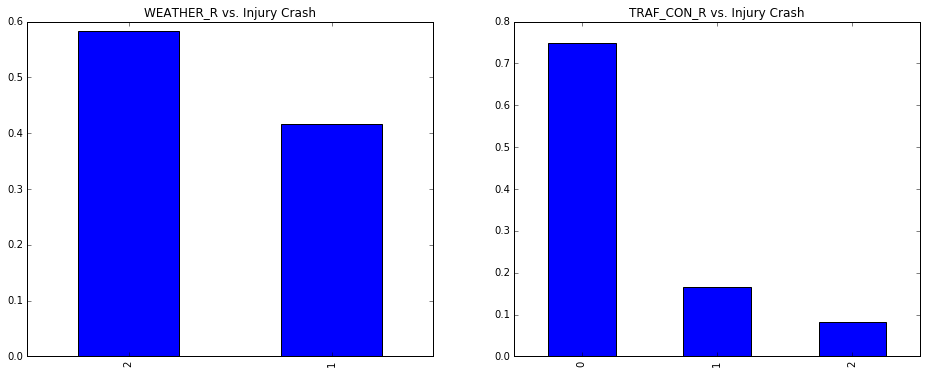

In [42]:
fig, axs = plt.subplots(1,2)
q82bi.WEATHER_R.value_counts('INJURY_CRASH').plot(kind='bar',title='WEATHER_R vs. Injury Crash',ax=axs[0],figsize=(16,6))
q82bi.TRAF_CON_R.value_counts('INJURY_CRASH').plot(kind='bar',title='TRAF_CON_R vs. Injury Crash',ax=axs[1],figsize=(16,6))

### Question 8.2 (b) ii.

In [54]:
injuries = accidents[accidents.INJURY_CRASH==1]
for val1 in pd.unique(injuries['WEATHER_R']):
    weather_adjusted = injuries[injuries.WEATHER_R==val1]
    for val2 in pd.unique(injuries['TRAF_CON_R']):
        traf_adjusted = weather_adjusted[weather_adjusted.TRAF_CON_R==val2]
        print "For WEATHER_R: %s and TRAF_CON_R: %s," % (val1,val2)," we get: ",len(traf_adjusted)/float(len(accidents)) 

For WEATHER_R: 1 and TRAF_CON_R: 0,  we get:  0.264371903373
For WEATHER_R: 1 and TRAF_CON_R: 2,  we get:  0.0719721214707
For WEATHER_R: 1 and TRAF_CON_R: 1,  we get:  0.0976222648934
For WEATHER_R: 2 and TRAF_CON_R: 0,  we get:  0.0430742242135
For WEATHER_R: 2 and TRAF_CON_R: 2,  we get:  0.00756228812555
For WEATHER_R: 2 and TRAF_CON_R: 1,  we get:  0.0131332527321


### Question 8.2 (b) iii.

### Question 8.2 (b) iv.

### Question 8.2 (b) v.

In [55]:
gnb = sklearn.naive_bayes.GaussianNB()

### Question 8.2 (c) i.

### Question 8.2 (c) ii.

### Question 8.2 (c) iii.

### Question 8.2 (c) iv.

### Question 8.2 (c) v.

### Question 8.2 (c) vi.

## Question 9.3

### Question 9.3 (a) i.

### Question 9.3 (a) ii.

### Question 9.3 (a) iii.

### Question 9.3 (a) iv.

### Question 9.3 (a) v.

### Question 9.3 (a) vi.

### Question 9.3 (a) vii.